In [1]:
import os
base_dir = 'C:\\Users\heine\github\PlateReaderTools'
os.chdir(base_dir) 

#import sys
from core import plate_reader_tools 
import pandas as pd
import numpy as np
# import math
# import matplotlib
import matplotlib.pyplot as plt
import string
import seaborn as sns
from itertools import chain

# import os
# import sys

# path = '/Users/andrewng/Documents/PlateReaderTools'
# if not path in sys.path:
#     sys.path.insert(1, path)
# del path

# from plate_reader_tools import *
# import seaborn as sns
# sns.set_style("white")
# sns.set_style("ticks")



In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
#%matplotlib inline

In [3]:
dirname = "C:\\Users\\heine\\Google Drive\\UCSF\\ElSamad_Lab\\CRISPR iGRNA\\experiments\\plate_reader\\"
fname = dirname + "20170504_igrna_TDH3_iguides_TEF1_newguides_BMH_mRFP_GFP_Venus_24H_20170505.xlsx"
#date = fname[-13:-5]
sheetname = 'Result sheet'
skiprows = 102  #skip until the row that has the label (i.e. OD) for the readout.
rows = 8
columns = 12
datalabels = ['OD','mRFP','Venus', 'sfGFP'] 
cycles = 147  #note only 146 cycles on last one - I wonder if the code copes with this
horz = 0

In [4]:
[d,time_list] = plate_reader_tools.readplate(fname,sheetname, skiprows, rows, columns, datalabels, cycles, horz)
OD_data = d['OD']

No OVER values in data


<IPython.core.display.Javascript object>


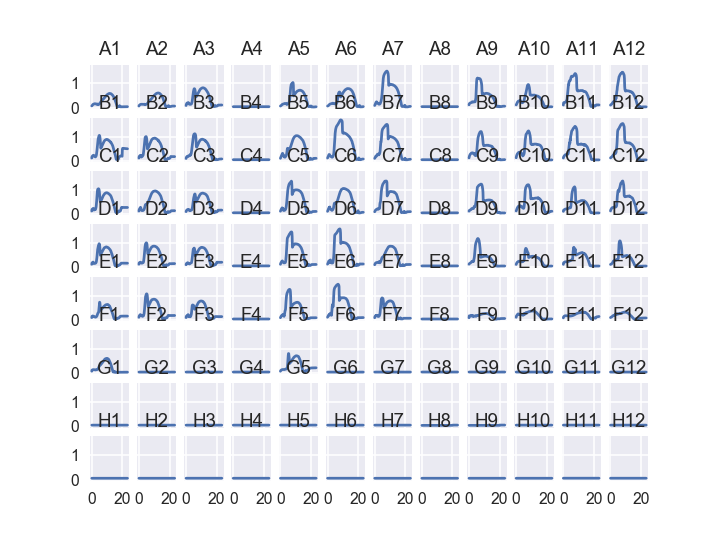

In [5]:
OD_data_filtered, OVER_list = plate_reader_tools.over_filter(OD_data)#Plot all wells in an array similar to the plate. 
letter_range = ['A','B','C','D','E','F','G','H']
number_range = range(1,13)
well_arr = plate_reader_tools.well_array_builder(letter_range,number_range)
fig = plate_reader_tools.subplot_array(OD_data_filtered, well_arr, time_list)

No OVER values in data


<IPython.core.display.Javascript object>


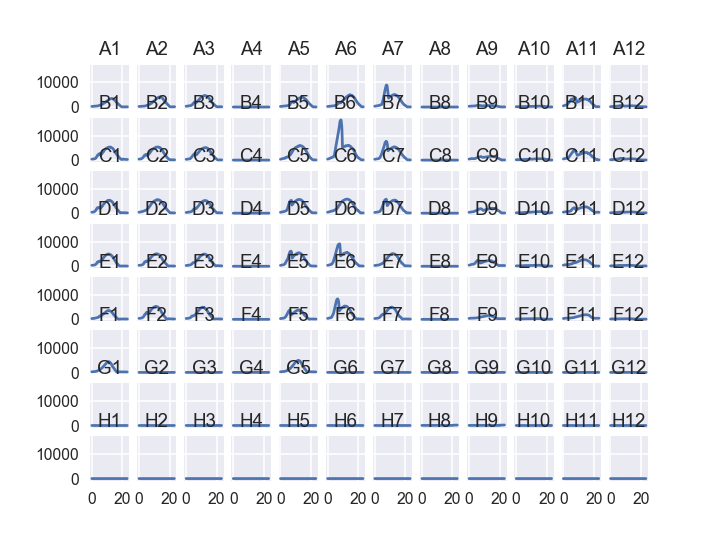

In [7]:
venus_data = d['Venus']
venus_data_filtered, venus_OVER_list = plate_reader_tools.over_filter(venus_data)#Plot all wells in an array similar to the plate. 
letter_range = ['A','B','C','D','E','F','G','H']
number_range = range(1,13)
well_arr = plate_reader_tools.well_array_builder(letter_range,number_range)
fig = plate_reader_tools.subplot_array(venus_data_filtered, well_arr, time_list)

In [8]:
#Growth curves for TEF1 new guide experiment

#Build Multiindex dataframe to compare different conditions.  
layer_names = ['Condition','Strain','Degron']
conditions = ['est','no_est']
strains = ['Guide 1', 'Guide 2','Guide 3', 'Guide 4', 'No guide']
degron = ['no_deg','deg']
experiment_setup = [conditions, strains, degron]      
data_index = pd.MultiIndex.from_product(experiment_setup, names= layer_names)
print(data_index.levels)
print(data_index.names)

[['est', 'no_est'], ['Guide 1', 'Guide 2', 'Guide 3', 'Guide 4', 'No guide'], ['deg', 'no_deg']]
['Condition', 'Strain', 'Degron']


In [ ]:
#No need to remove levels - all samples were fine. 

In [10]:
#Assign wells in the correct order to the index. 


#This is a manuyal process - you either can usethis tool
#to print out the order of the conditions so that you can generate a list of wells yourself or use
#the input function to build it one well at a time.  
#If you break in the middle of the routine the well_list will be there in memory or you can copy / paste it from the screen

#new_labels =  [(np.delete(label_level,inds_to_remove)) for label_level in data_index.labels]
#data_index_adjusted = pd.MultiIndex(levels = data_index.levels, labels = new_labels , names = data_index.names)

well_list = plate_reader_tools.view_or_input_exp_design(data_index)


print out list (1) or add wells one by one (2)2
input well for ['est', 'Guide 1', 'no_deg'] : A9
correct well: A9? 1=Yes, 0 = No, exit = break loop1
['A9']
input well for ['est', 'Guide 1', 'deg'] : A10
correct well: A10? 1=Yes, 0 = No, exit = break loop1
['A9', 'A10']
input well for ['est', 'Guide 2', 'no_deg'] : B9
correct well: B9? 1=Yes, 0 = No, exit = break loop1
['A9', 'A10', 'B9']
input well for ['est', 'Guide 2', 'deg'] : B10
correct well: B10? 1=Yes, 0 = No, exit = break loop1
['A9', 'A10', 'B9', 'B10']
input well for ['est', 'Guide 3', 'no_deg'] : C9
correct well: C9? 1=Yes, 0 = No, exit = break loop1
['A9', 'A10', 'B9', 'B10', 'C9']
input well for ['est', 'Guide 3', 'deg'] : C10
correct well: C10? 1=Yes, 0 = No, exit = break loop1
['A9', 'A10', 'B9', 'B10', 'C9', 'C10']
input well for ['est', 'Guide 4', 'no_deg'] : D9
correct well: D9? 1=Yes, 0 = No, exit = break loop1
['A9', 'A10', 'B9', 'B10', 'C9', 'C10', 'D9']
input well for ['est', 'Guide 4', 'deg'] : D10
correct well: 

In [11]:
well_list

['A9',
 'A10',
 'B9',
 'B10',
 'C9',
 'C10',
 'D9',
 'D10',
 'E9',
 'E10',
 'A11',
 'A12',
 'B11',
 'B12',
 'C11',
 'C12',
 'D11',
 'D12',
 'E11',
 'E12']

In [12]:
blank = OD_data['A8']

growth_data = []
growth_data.append([OD_data[well]-blank for well in well_list])
growth_data = list(chain.from_iterable(growth_data))

                          
                          
growth_data_df = pd.DataFrame(growth_data, index=data_index_adjusted)

growth_data_df
# # #growth_data_df.sort_index(inplace = True)

0       1       2       3       4       5    \
Condition Strain   Degron                                                   
est       Guide 1  no_deg  0.0721  0.1161  0.1288  0.1378  0.1461  0.1514   
                   deg     0.0689  0.0908  0.1174  0.1424  0.1633  0.1785   
          Guide 2  no_deg  0.0716  0.1212  0.1578  0.1854  0.2051  0.2222   
                   deg     0.0783  0.1324  0.1713  0.2025  0.2232  0.2402   
          Guide 3  no_deg  0.0655  0.0943  0.1023  0.1096  0.1143  0.1196   
                   deg     0.0748  0.1054  0.1336  0.1605  0.1861  0.2075   
          Guide 4  no_deg  0.0670  0.0858  0.0968  0.1031  0.1117  0.1198   
                   deg     0.0577  0.0873  0.1108  0.1272  0.1415  0.1542   
          No guide no_deg  0.0495  0.1303  0.1252  0.1254  0.1269  0.1290   
                   deg     0.0671  0.1209  0.1350  0.1499  0.1613  0.1742   
no_est    Guide 1  no_deg  0.0638  0.1497  0.1670  0.1709  0.1697  0.1718   
                   deg     0.0625  0.0740  0.0816  0.0886  0.0971  0.1055   
          Guide 2  no_deg  0.0683  0.1060  0.1278  0.1466  0.1606  0.1738   
                   deg     0.0742  0.0820  0.0906  0.0975  0.1058  0.1152   
          Guide 3  no_deg  0.0587  0.1069  0.1151  0.1190  0.1272  0.1356   
                   deg     0.0761  0.1129  0.1372  0.1542  0.1671  0.1835   
          Guide 4  no_deg  0.0625  0.1237  0.1346  0.1406  0.1492  0.1550   
                   deg     0.0593  0.0644  0.0715  0.0761  0.0822  0.0891   
          No guide no_deg  0.0442  0.0833  0.0977  0.1077  0.1163  0.1224   
                   deg     0.0576  0.0654  0.0712  0.0783  0.0798  0.0845   

                              6       7       8       9     ...       137  \
Condition Strain   Degron                                   ...             
est       Guide 1  no_deg  0.1534  0.1568  0.1613  0.1661   ...    0.0152   
                   deg     0.1950  0.2073  0.2184  0.2235   ...   -0.0037   
          Guide 2  no_deg  0.2358  0.2467  0.2559  0.2650   ...    0.0003   
                   deg     0.2545  0.2681  0.2792  0.2854   ...   -0.0079   
          Guide 3  no_deg  0.1238  0.1269  0.1316  0.1382   ...   -0.0058   
                   deg     0.2256  0.2409  0.2543  0.2639   ...    0.0377   
          Guide 4  no_deg  0.1252  0.1318  0.1392  0.1472   ...   -0.0040   
                   deg     0.1623  0.1707  0.1764  0.1809   ...   -0.0060   
          No guide no_deg  0.1256  0.1225  0.1432  0.1385   ...    0.0187   
                   deg     0.1881  0.1871  0.2091  0.2069   ...    0.0011   
no_est    Guide 1  no_deg  0.1728  0.1731  0.1765  0.1821   ...    0.0713   
                   deg     0.1169  0.1306  0.1466  0.1625   ...   -0.0076   
          Guide 2  no_deg  0.1822  0.1940  0.2016  0.2065   ...   -0.0059   
                   deg     0.1226  0.1340  0.1489  0.1631   ...   -0.0060   
          Guide 3  no_deg  0.1419  0.1468  0.1518  0.1544   ...   -0.0053   
                   deg     0.2040  0.2077  0.2093  0.2164   ...   -0.0015   
          Guide 4  no_deg  0.1608  0.1649  0.1663  0.1672   ...   -0.0054   
                   deg     0.0979  0.1093  0.1230  0.1409   ...   -0.0056   
          No guide no_deg  0.1291  0.1313  0.1325  0.1321   ...    0.0883   
                   deg     0.0930  0.0975  0.1095  0.1141   ...    0.0400   

                              138     139     140     141     142     143  \
Condition Strain   Degron                                                   
est       Guide 1  no_deg  0.0166  0.0181  0.0183  0.0186  0.0186  0.0189   
                   deg    -0.0039 -0.0049 -0.0054 -0.0056 -0.0058 -0.0059   
          Guide 2  no_deg  0.0018  0.0030  0.0036  0.0037  0.0040  0.0042   
                   deg    -0.0070 -0.0065 -0.0064 -0.0064 -0.0066 -0.0067   
          Guide 3  no_deg -0.0059 -0.0059 -0.0057 -0.0056 -0.0055 -0.0055   
                   deg     0.0462  0.0530  0.0599  0.0610  0.0618  0.0632   
          Guide 4  no_de

<IPython.core.display.Javascript object>


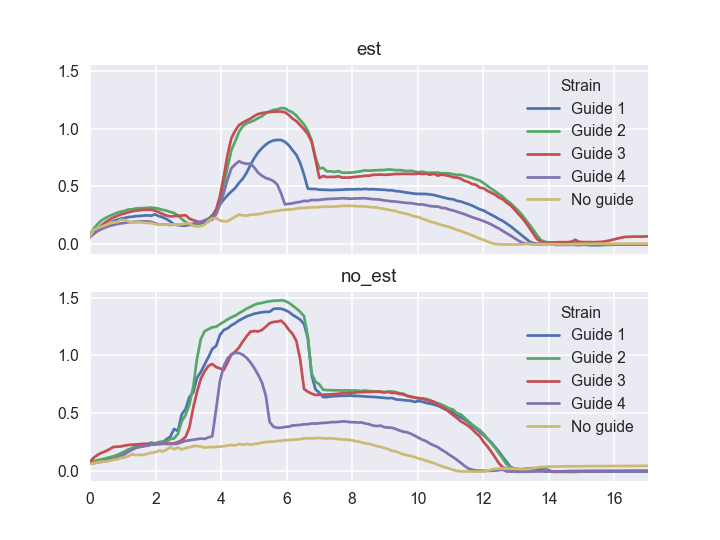

In [28]:
#Select out just the no_degron data
growth_data_df_deg = growth_data_df.xs('deg',level = 'Degron')

#make columns time points
dt = 7.0/60.0
growth_data_df_deg.columns = growth_data_df_deg.columns*dt

#in an axis with a subplot
fig, ax = plt.subplots(2, 1,sharex = True, sharey = True)



for jj in range(0,2):
    growth_data_df_deg_est = growth_data_df_deg.xs(conditions[jj],level = 'Condition')
    growth_data_df_deg_est.transpose().plot(ax=ax[jj],title = conditions[jj])

In [21]:
140*7/60

16.333333333333332